# Analisi dei dati raccolti

## Setup

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

from types import FunctionType

In [30]:
def plotter(dataframes: list, index: str, names: list, space: int) -> None:
    xvalues_int = list()
    xvalues_str = list()
    for name in names:
        xvalues_str.extend(["", name, ""])

    plt.gcf().set_size_inches(10, 6)
    plt.title("Generazione" if "A" in index else "Verifica")
    plt.ylabel("Tempo di esecuzione")
    
    start = 1
    ymax = 0
    for dataframe in dataframes:
        series = dataframe[index]
        ymax = max(ymax, max(series))
        x = [start, start+1, start+2]
        xvalues_int.extend(x)
        plt.bar(x, [series.min(), series.mean(), series.max()])
        start += 5
    
    plt.xticks(xvalues_int, xvalues_str, rotation=90)
    plt.yticks([i for i in range(0, ymax+space, space)])
    plt.grid(axis="y")
    
    plt.show()

In [31]:
PATH = "../asconprfav12/data/{}.csv"

IMPLEMENTATIONS = [
    "armv7m", "armv7m_small", "bi32", "bi32_armv7m", "bi32_lowreg", "opt32", "ref"
]

armv7m = pd.read_csv(open(PATH.format("armv7m"), "r"), delimiter=";")
armv7m_small = pd.read_csv(open(PATH.format("armv7m_small"), "r"), delimiter=";")
bi32 = pd.read_csv(open(PATH.format("bi32"), "r"), delimiter=";")
bi32_armv7m = pd.read_csv(open(PATH.format("bi32_armv7m"), "r"), delimiter=";")
bi32_lowreg = pd.read_csv(open(PATH.format("bi32_lowreg"), "r"), delimiter=";")
opt32 = pd.read_csv(open(PATH.format("opt32"), "r"), delimiter=";")
ref = pd.read_csv(open(PATH.format("ref"), "r"), delimiter=";")

DATAFRAMES = [
    armv7m, armv7m_small, bi32, bi32_armv7m, bi32_lowreg, opt32, ref
]

INDEX = armv7m.columns

## Grafici

Ogni grafico presente in questo notebook è suddiviso in sette parti, ognuna delle quali contiene una rappresentazione dei dati raccolti durante il testing in fase di generazione o verifica del tag di una data implementazione

Le implementazioni, che vanno a indicizzare l'asse delle X, vengono rappresentate da tre barre:
* la barra di sinistra rappresenta il valore **minimo**
* la barra centrale rappresenta il valore **medio**
* la barra di destra rappresenta il valore **massimo**

I valori sull'asse Y rappresentano il tempo di esecuzione in **microsecondi**

### PT vuoto

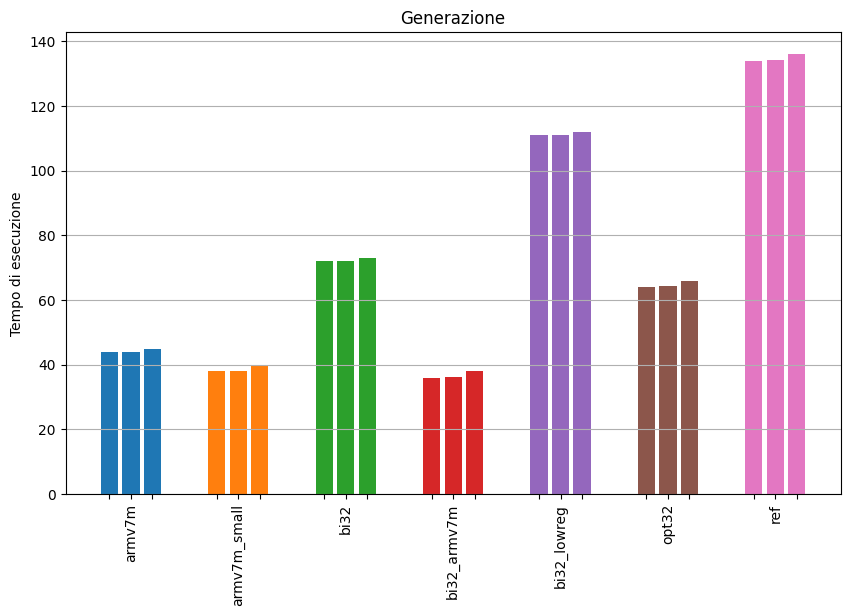

In [32]:
# Generazione tag
plotter(DATAFRAMES, "0B-A", IMPLEMENTATIONS, 20)

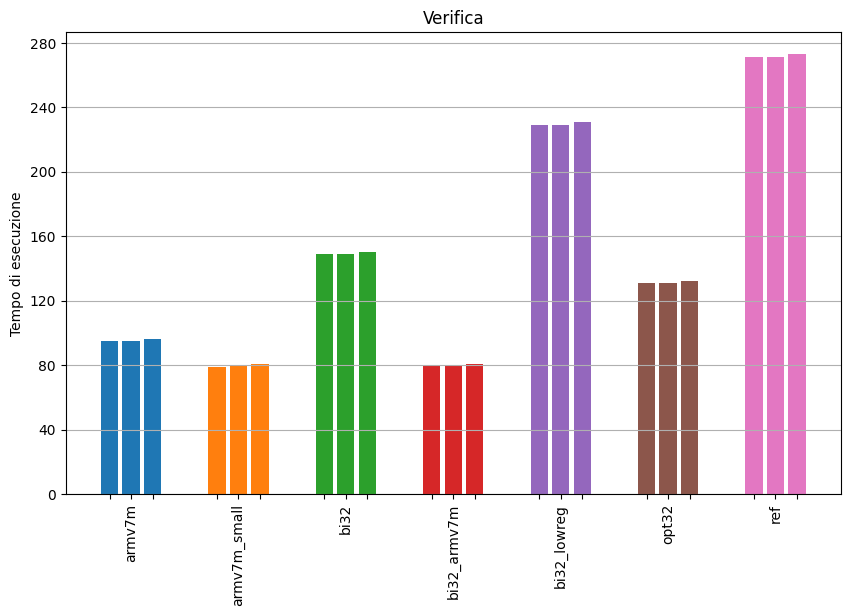

In [33]:
# Verifica tag
plotter(DATAFRAMES, "0B-V", IMPLEMENTATIONS, 40)

### PT 8 byte

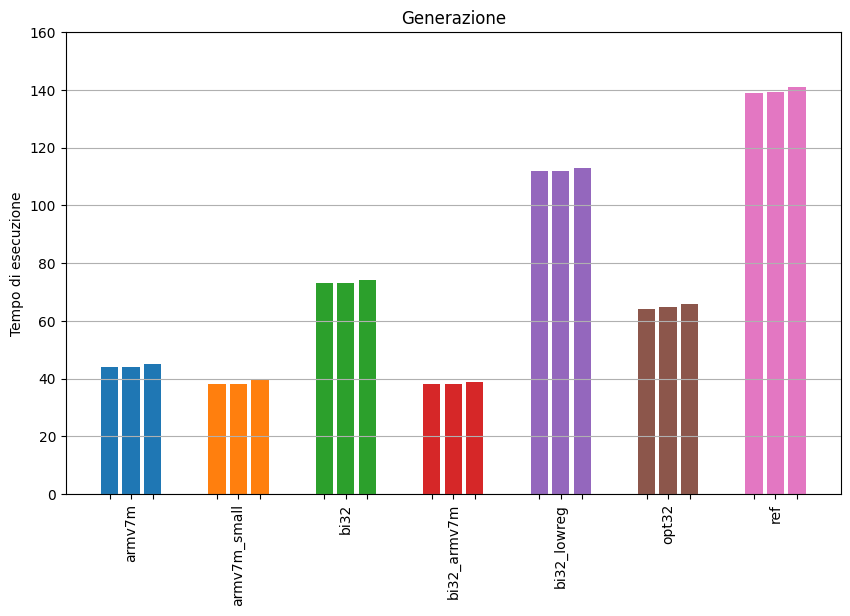

In [34]:
# Generazione tag
plotter(DATAFRAMES, "8B-A", IMPLEMENTATIONS, 20)

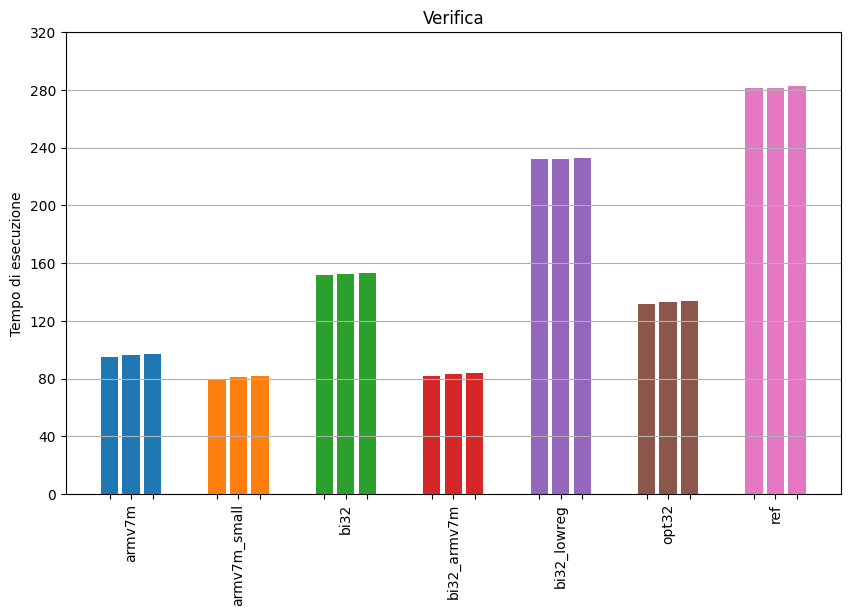

In [35]:
# Verifica tag
plotter(DATAFRAMES, "8B-V", IMPLEMENTATIONS, 40)

### PT 16 byte

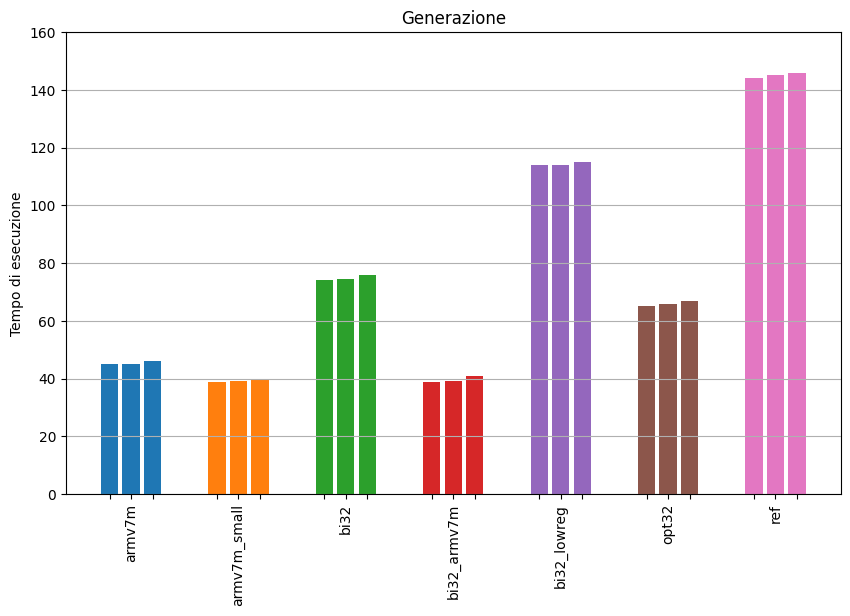

In [36]:
# Generazione tag
plotter(DATAFRAMES, "16B-A", IMPLEMENTATIONS, 20)

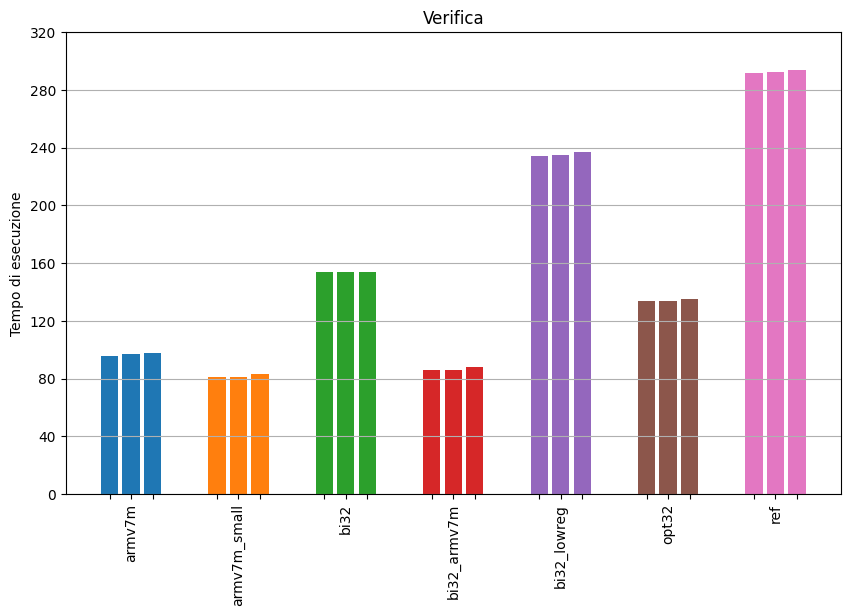

In [37]:
# Verifica tag
plotter(DATAFRAMES, "16B-V", IMPLEMENTATIONS, 40)

### PT 32 byte

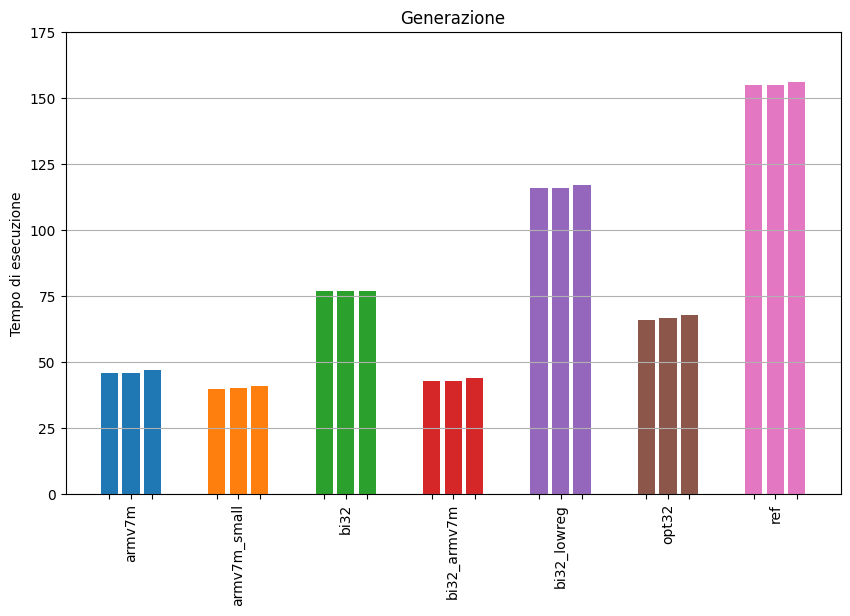

In [38]:
# Generazione tag
plotter(DATAFRAMES, "32B-A", IMPLEMENTATIONS, 25)

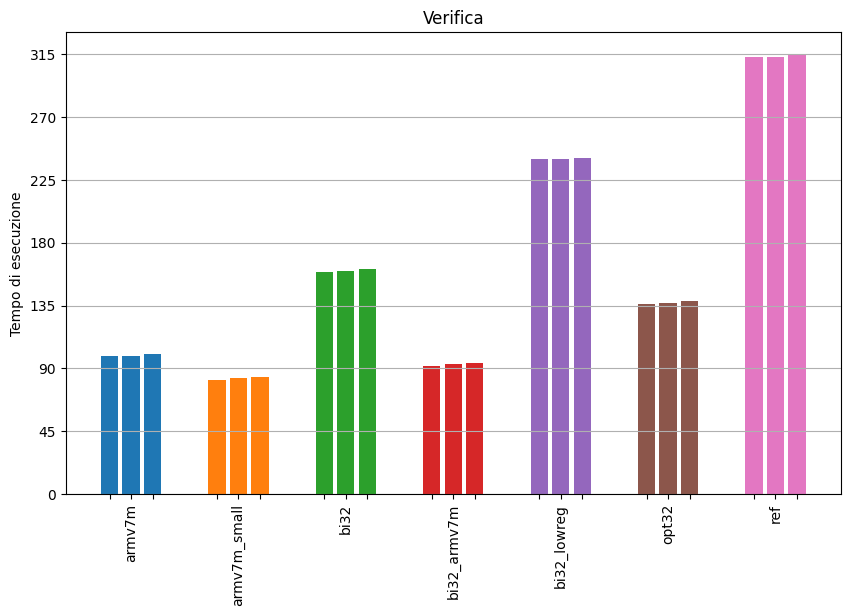

In [39]:
# Verifica tag
plotter(DATAFRAMES, "32B-V", IMPLEMENTATIONS, 45)

#### PT 64 byte

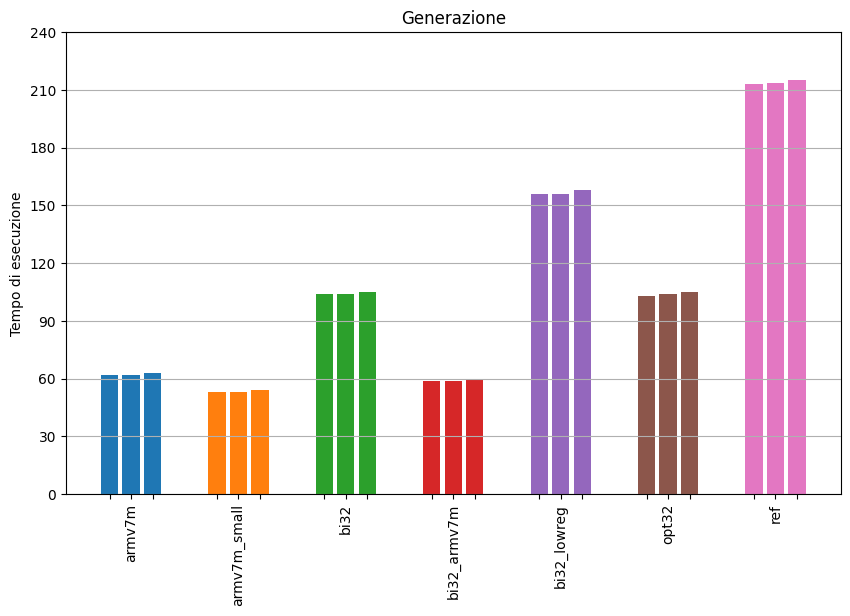

In [40]:
# Generazione tag
plotter(DATAFRAMES, "64B-A", IMPLEMENTATIONS, 30)

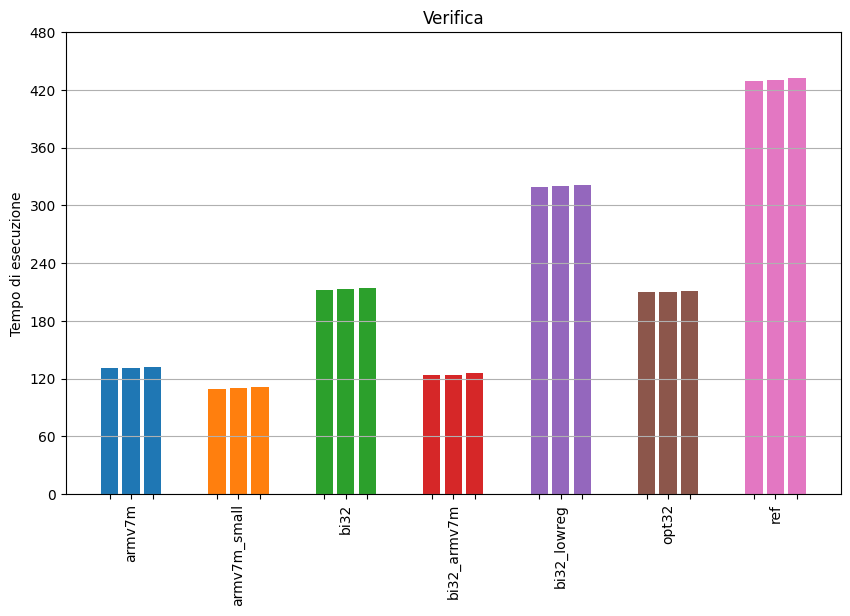

In [41]:
# Verifica tag
plotter(DATAFRAMES, "64B-V", IMPLEMENTATIONS, 60)

#### PT 128 byte

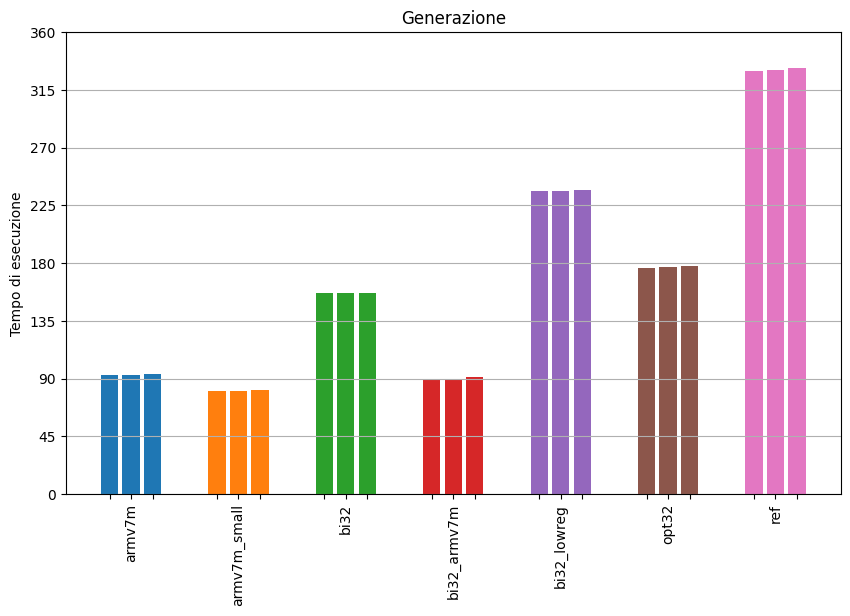

In [42]:
# Generazione tag
plotter(DATAFRAMES, "128B-A", IMPLEMENTATIONS, 45)

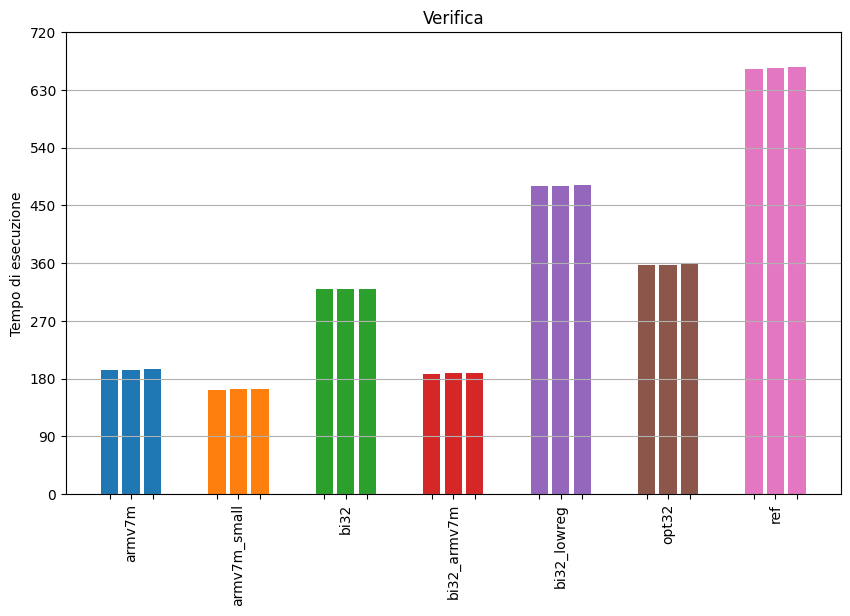

In [43]:
# Verifica tag
plotter(DATAFRAMES, "128B-V", IMPLEMENTATIONS, 90)

#### PT 256 byte

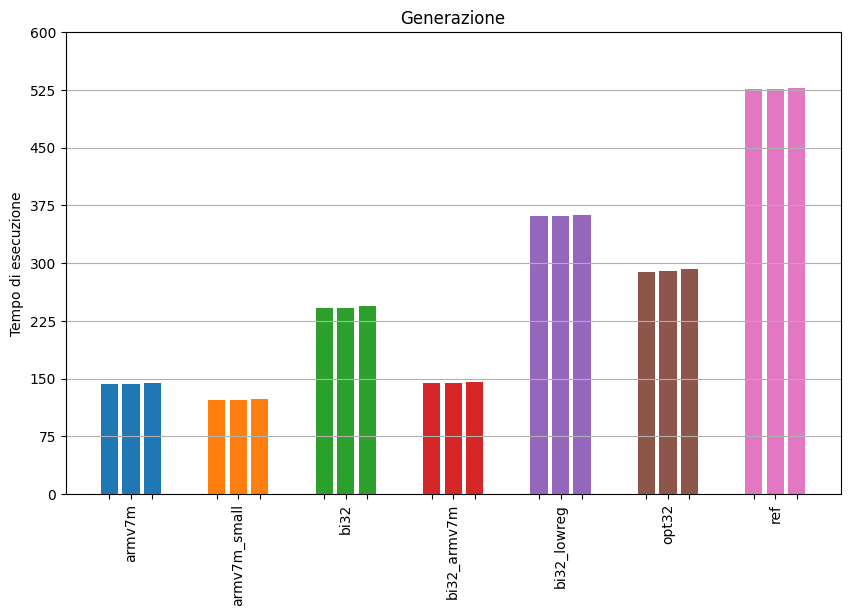

In [44]:
# Generazione tag
plotter(DATAFRAMES, "256B-A", IMPLEMENTATIONS, 75)

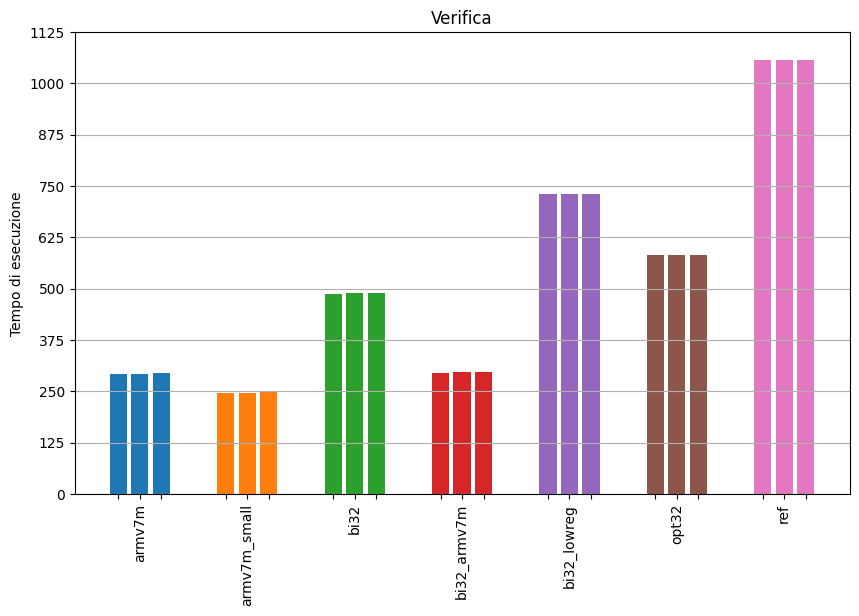

In [45]:
# Verifica tag
plotter(DATAFRAMES, "256B-V", IMPLEMENTATIONS, 125)

#### PT 512 byte

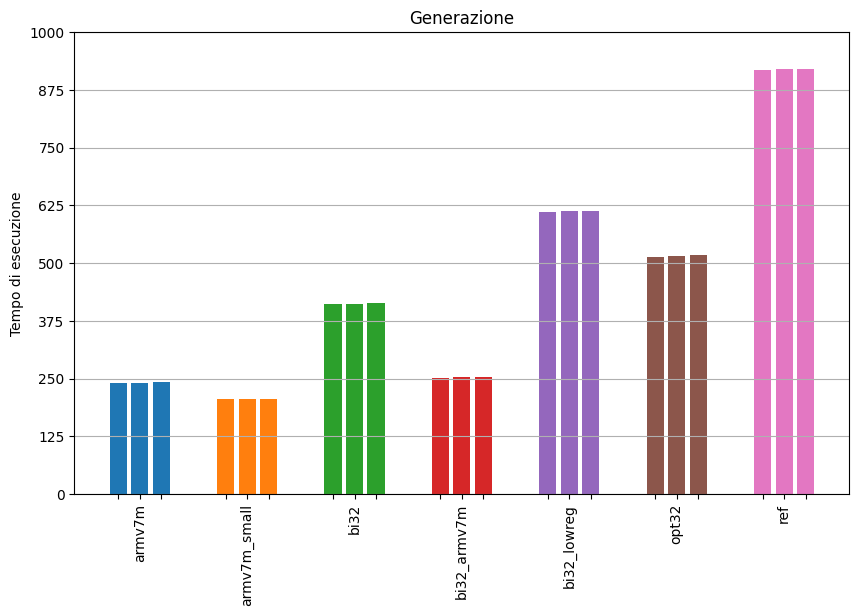

In [46]:
# Generazione tag
plotter(DATAFRAMES, "512B-A", IMPLEMENTATIONS, 125)

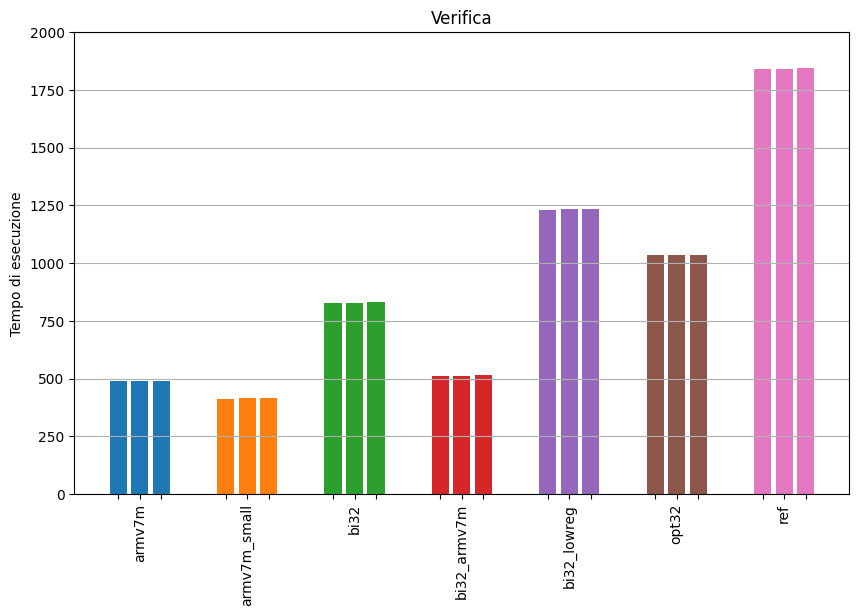

In [47]:
# Verifica tag
plotter(DATAFRAMES, "512B-V", IMPLEMENTATIONS, 250)

#### PT 1024 byte

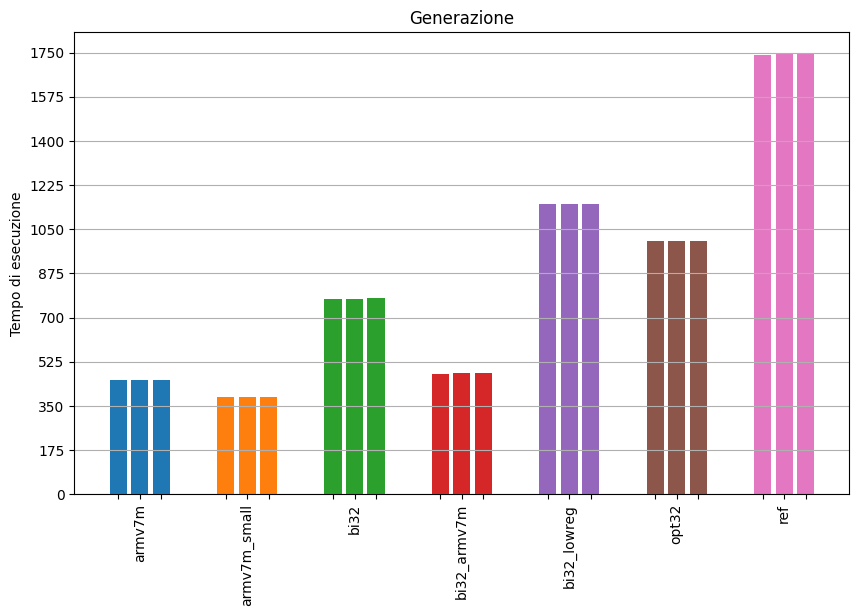

In [48]:
# Generazione tag
plotter(DATAFRAMES, "1024B-A", IMPLEMENTATIONS, 175)

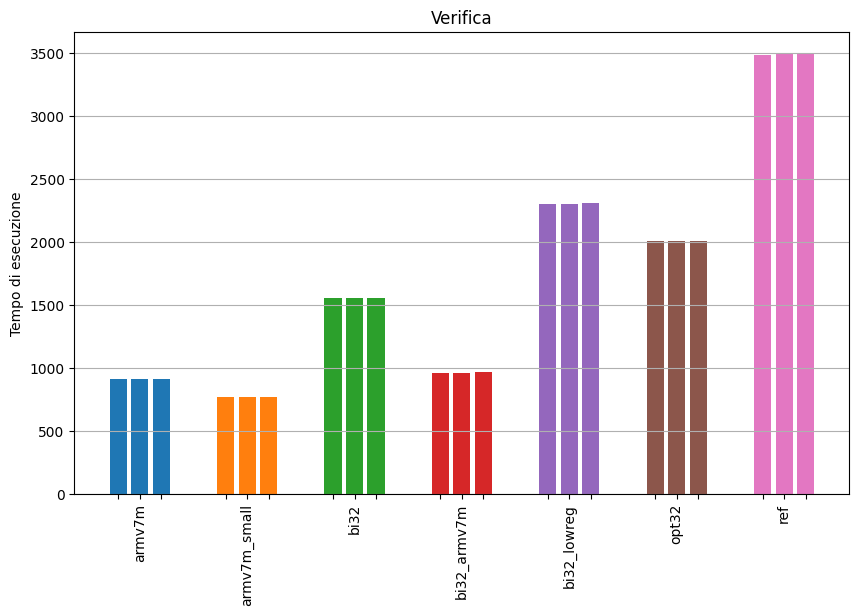

In [49]:
# Verifica tag
plotter(DATAFRAMES, "1024B-V", IMPLEMENTATIONS, 500)

## Conclusioni

### Setup

In [50]:
def checker(dataframes: list, columns: list, index: int, check: FunctionType) -> None:
    for column in columns:
        test_series = dataframes[index][column]
        for i in range(len(dataframes)):
            if i == index:
                continue
            series = dataframes[i][column]
            assert check(test_series.min(), series.min())
            assert check(test_series.mean(), series.mean())
            assert check(test_series.max(), series.max())

    print("Nessuna AssertionError è stata sollevata")

In [51]:
def template(best: pd.DataFrame, worst: pd.DataFrame, columns: list, calculate: FunctionType) -> None:
    results = [[], [], []]
    for column in columns:
        best_series = best[column]
        worst_series = worst[column]
        results[0].append(calculate(best_series.min(), worst_series.min()))
        results[1].append(calculate(best_series.mean(), worst_series.mean()))
        results[2].append(calculate(best_series.max(), worst_series.max()))
    
    results = [
        [min(results[0]), max(results[0])],
        [min(results[1]), max(results[1])],
        [min(results[2]), max(results[2])]
    ]

    print(f"Rispetto alla misurazione minima: da {results[0][0]} a {results[0][1]}")
    print(f"Rispetto alla misurazione media: da {results[1][0]} a {results[1][1]}")
    print(f"Rispetto alla misurazione massima: da {results[2][0]} a {results[2][1]}")

In [52]:
def times(best: pd.DataFrame, worst: pd.DataFrame, columns: list) -> None:
    def calculate(best: int, worst: int) -> float:
        return np.around( worst/best, 2 )
    template(best, worst, columns, calculate)
    
    
def percentage_increase(best: pd.DataFrame, worst: pd.DataFrame, columns: list) -> None:
    def calculate(best: int, worst: int) -> float:
        return np.around( ((worst * 100) / best) - 100, 2 )
    template(best, worst, columns, calculate)

### Migliori implementazioni

Considerando PT di grandezza $0$, $8$ e $16$ byte, le implementazioni `bi32_armv7m` e `armv7m_small` non si dominano, e sono seguite dall'implementazione `armv7m`, che, come quelle migliori, è ottimizzata per architetture ARMv7-M

Considerando invece PT di grandezza $32$, $64$, $128$, $256$, $512$ e $1024$ byte, l'implementazione migliore è la `armv7m_small`

In [53]:
# Bi32_armv7m e armv7m_small migliori implementazioni
for i in range(0,len(INDEX),2):
    try:
        checker(DATAFRAMES, INDEX[i:i+2], 1, lambda x,y : x < y)
    except AssertionError:
        print(f"Armv7m_small non domina {INDEX[i]} e {INDEX[i+1]}")
    try:
        checker(DATAFRAMES, INDEX[i:i+2], 3, lambda x,y : x < y)
    except AssertionError:
        print(f"Bi32_armv7m non domina {INDEX[i]} e {INDEX[i+1]}")
    print()

Armv7m_small non domina 0B-A e 0B-V
Bi32_armv7m non domina 0B-A e 0B-V

Armv7m_small non domina 8B-A e 8B-V
Bi32_armv7m non domina 8B-A e 8B-V

Armv7m_small non domina 16B-A e 16B-V
Bi32_armv7m non domina 16B-A e 16B-V

Nessuna AssertionError è stata sollevata
Bi32_armv7m non domina 32B-A e 32B-V

Nessuna AssertionError è stata sollevata
Bi32_armv7m non domina 64B-A e 64B-V

Nessuna AssertionError è stata sollevata
Bi32_armv7m non domina 128B-A e 128B-V

Nessuna AssertionError è stata sollevata
Bi32_armv7m non domina 256B-A e 256B-V

Nessuna AssertionError è stata sollevata
Bi32_armv7m non domina 512B-A e 512B-V

Nessuna AssertionError è stata sollevata
Bi32_armv7m non domina 1024B-A e 1024B-V



### Peggiori implementazioni

L'implementazione `ref` è quella che ha ottenuto i tempi di esecuzione peggiori in ogni possibile grandezza di PT considerata

A seguire abbiamo le implementazioni `bi32_lowreg`, `opt32` e `bi32`, ma con tempi di esecuzione nettamente migliori: infatti, l'implementazione `ref` è almeno il $18$\% più lenta rispetto alla prima citata, arrivando fino al $52$\%, e circa $3.4/4.55$ volte più lenta dell'implementazione migliore

Notiamo subito come le implementazioni peggiori sono quelle che cercano di ottimizzare architetture $32$ bit generiche oppure quella priva di ottimizzazioni

In [54]:
# Ref peggiore implementazione
for i in range(0,len(INDEX),2):
    try:
        checker(DATAFRAMES, INDEX, 6, lambda x,y : x > y)
    except AssertionError:
        print(f"Ref non domina {INDEX[i]} e {INDEX[i+1]}")
    print()

Nessuna AssertionError è stata sollevata

Nessuna AssertionError è stata sollevata

Nessuna AssertionError è stata sollevata

Nessuna AssertionError è stata sollevata

Nessuna AssertionError è stata sollevata

Nessuna AssertionError è stata sollevata

Nessuna AssertionError è stata sollevata

Nessuna AssertionError è stata sollevata

Nessuna AssertionError è stata sollevata



In [55]:
# Ref quante volte è peggio di armv7m_small, migliore per quasi ogni PT
times(armv7m_small, ref, INDEX)

Rispetto alla misurazione minima: da 3.43 a 4.53
Rispetto alla misurazione media: da 3.39 a 4.53
Rispetto alla misurazione massima: da 3.37 a 4.52


In [56]:
# Ref quanti punti percentuali è peggio di bi32_lowreg, seconda peggiore
percentage_increase(bi32_lowreg, ref, INDEX)

Rispetto alla misurazione minima: da 18.34 a 51.52
Rispetto alla misurazione media: da 18.34 a 51.66
Rispetto alla misurazione massima: da 18.18 a 51.65


### Dimensioni eseguibile

Le implementazioni `armv7m_small`, `ref` e `bi32_lowreg` sono quelle sono quelle che hanno una dimensione dell'eseguibile molto piccola, occupando circa il $2/3$\% dello spazio disponibile, ma di queste tre solo la prima può vantare anche degli ottimi tempi di esecuzione

L'implementazione peggiore dal punto di vista dello spazio è invece la `opt32`, che occupa circa il $6/7$\% dello spazio disponibile

Considerando l'altra implementazione migliore, quindi la `bi32_armv7m`, essa occupa circa il $4/5$\% dello spazio disponibile, dimostrandosi un'ottima soluzione anche per quanto riguarda lo spazio occupato